In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

import main

In [2]:
result = main.run(total_periods = 1000000, alpha = 0.2, gamma = 0.95, beta = 1*1e-5, lambda0=1000, lambda1=0.9995)
#alpha 0.125 appear to converge

 86%|████████▌ | 861675/1000000 [03:08<00:30, 4576.03it/s]


In [3]:
result.print_results()

  Bertrand Price    Monopoly Price    Bertrand Profit    Monopoly Profit
----------------  ----------------  -----------------  -----------------
         1.47292           1.92498           0.222925            0.33749
Name                   Average Price    Average Profit    Normalised Profit
-------------------  ---------------  ----------------  -------------------
QLearningWithMemory          1.69892          0.280176             0.499725
QLearningWithMemory          1.6989           0.280186             0.499813
Name                 Description
-------------------  -------------------------------------------------------------------------------------------
QLearningWithMemory  : quality=2, mc=1, alpha=0.2, gamma=0.95, policy = (TimeDecliningExploration: beta = 1e-05)
QLearningWithMemory  : quality=2, mc=1, alpha=0.2, gamma=0.95, policy = (TimeDecliningExploration: beta = 1e-05)
Reward Calculation used:  StandardReward




# Check the number of times each state is being updated

In [14]:
len(result.env.history.Q_history)

102525

In [ ]:
state_history = pd.DataFrame(result.env.history.state_history)
state_history = state_history.astype(({0:"string",1:"string"})) #convert into string format so value counts can work
times_each_state_being_updated = state_history.apply(pd.value_counts)
#times_each_state_being_updated.index.values.tolist() 
#times_each_state_being_updated
state_history

# Checking initial Q matrix vs final Q matrix for Binary State Q learning


In [19]:
init_Q1 = result.env.agents[0].Q_just_initialised
init_Q2 = result.env.agents[1].Q_just_initialised
final_Q1 = result.env.agents[0].Q
final_Q2 = result.env.agents[1].Q


# Biggest difference in action values for each states in initialised Q matrix

In [20]:
Q1_dict = []
for state, action in init_Q1.items():
    Q1_dict.append({"State":str(state), **action})
Q1_df = pd.DataFrame.from_dict(Q1_dict)
Q1_df['diff'] = abs(Q1_df[1.4729218286936814] - Q1_df[1.9249809389308554])
Q1_df.sort_values(by='diff', ascending=False)

,State,1.4729218286936814,1.9249809389308554,diff
12,"(1, 1, 0, 0)",0.104920,0.934211,0.829291
14,"(1, 1, 1, 0)",0.993884,0.310125,0.683759
0,"(0, 0, 0, 0)",0.057166,0.614936,0.557770
5,"(0, 1, 0, 1)",0.457516,0.995268,0.537752
3,"(0, 0, 1, 1)",0.720148,0.186089,0.534059
8,"(1, 0, 0, 0)",0.961506,0.441670,0.519836
7,"(0, 1, 1, 1)",0.789422,0.379346,0.410075
13,"(1, 1, 0, 1)",0.476493,0.087458,0.389035
1,"(0, 0, 0, 1)",0.549262,0.854149,0.304887
9,"(1, 0, 0, 1)",0.503929,0.769263,0.265334


In [8]:
init_Q1 = result.env.agents[0].Q_just_initialised
init_Q2 = result.env.agents[1].Q_just_initialised

final1=0
final2=0

for state, action in init_Q1.items():
    if list(action.values())[0] < list(action.values())[1]:
        final1+=1
for state, action in init_Q2.items():
    if list(action.values())[0] < list(action.values())[1]:
        final2+=1
print("number of Q values at the start of experiment that are higher for Monopoly Price")
print("agent 1: ", final1, "agent 2: ", final2)

number of Q values at the start of experiment that are higher for Monopoly Price
agent 1:  5 agent 2:  8


In [9]:
final_Q1 = result.env.agents[0].Q
final_Q2 = result.env.agents[1].Q

final1=0
final2=0
for state, action in final_Q1.items():
    if list(action.values())[0] < list(action.values())[1]:
        final1+=1
for state, action in final_Q2.items():
    if list(action.values())[0] < list(action.values())[1]:
        final2+=1
print("number of Q values after end of experiment that are higher for Monopoly Price")
print("final 1: ", final1, "final 2: ", final2)

number of Q values after end of experiment that are higher for Monopoly Price
final 1:  4 final 2:  8


# Price History of Agents

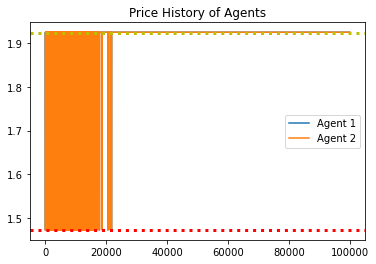

In [29]:
agent_1 = np.array(result.price_history)[-100000:,0]
agent_2 = np.array(result.price_history)[-100000:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.axhline(y=1.924, linewidth=3,color='y',linestyle="dotted")
plt.axhline(y=1.472, linewidth=3,color='r',linestyle="dotted")
plt.legend(['Agent 1', "Agent 2"])
plt.title("Price History of Agents")
plt.show()

# Reward history of agents

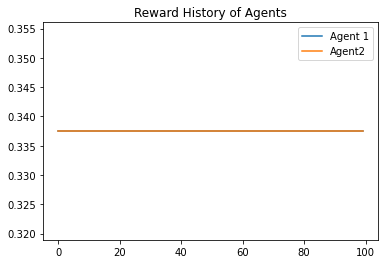

In [24]:
agent_1 = np.array(result.reward_history)[-100:,0]
agent_2 = np.array(result.reward_history)[-100:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.legend(['Agent 1', "Agent2"])
plt.title("Reward History of Agents")
plt.show()

##### Time Series of Normalized Profits

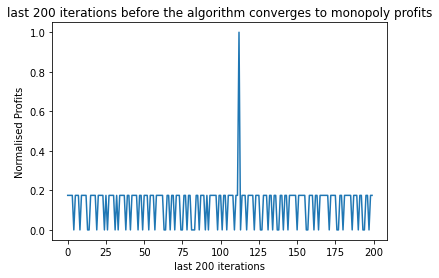

In [25]:
mean_profits = np.array(result.normalised_profits_time_series)[119800:120000].mean(axis=1)
df = pd.DataFrame({'mean profits': mean_profits})
plt.plot(df)
plt.title("last 200 iterations before the algorithm converges to monopoly profits")
plt.ylabel("Normalised Profits")
plt.xlabel("last 200 iterations")
plt.show()

In [21]:
def time_series_action_values(state, agent):
    hist = [Q[agent][state] for Q in result.env.history.Q_history]
    time_series_of_action_value_given_state = pd.DataFrame(hist)
    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot(time_series_of_action_value_given_state)
    plt.title("Time Series of Action Values of State: {} for Agent {}".format(str(state), agent))
    plt.legend(['Nash', "Monopoly"])

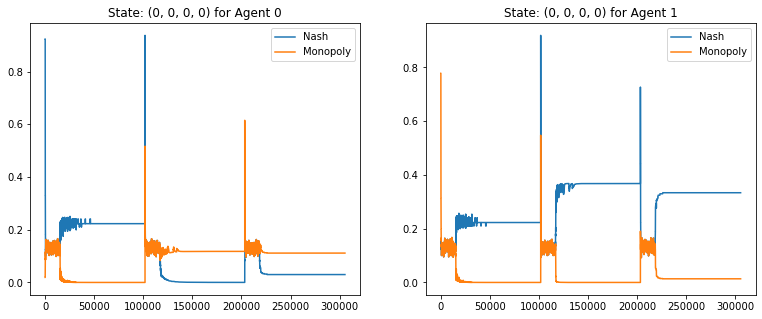

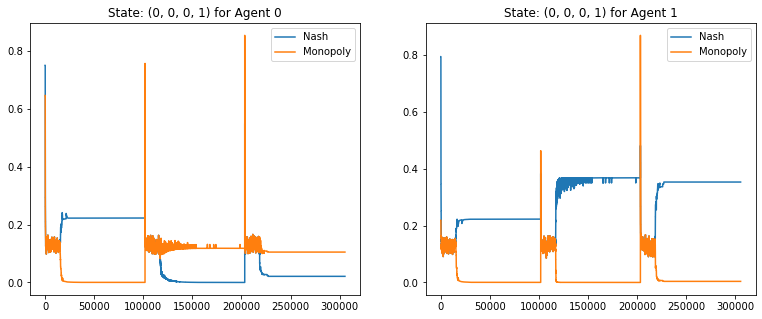

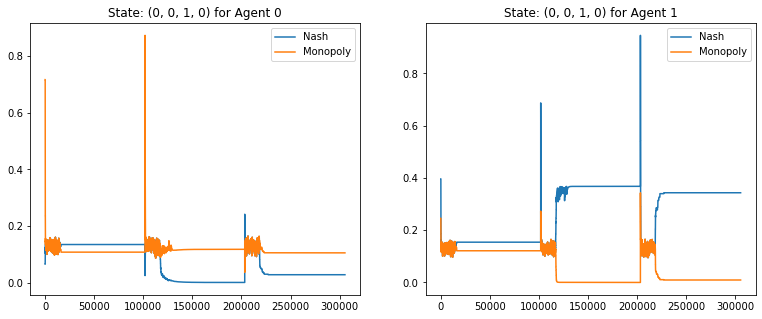

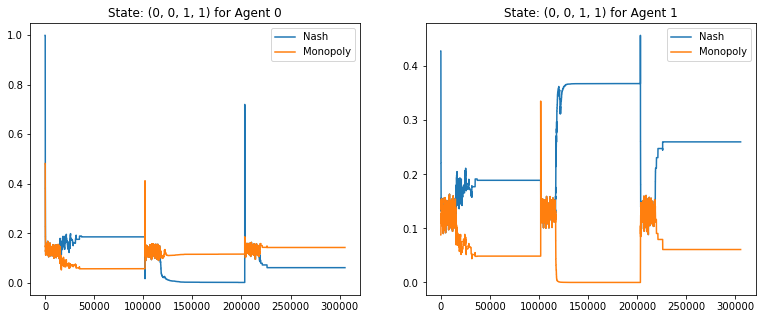

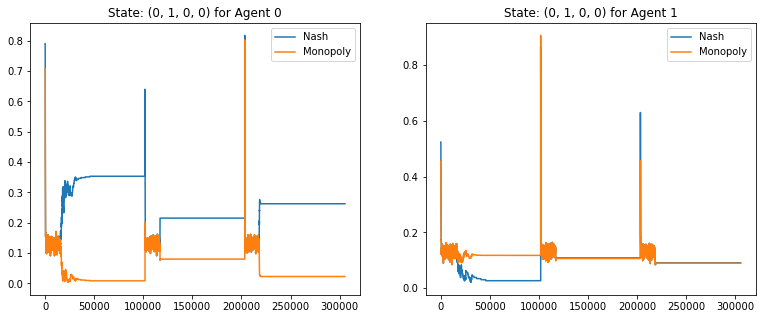

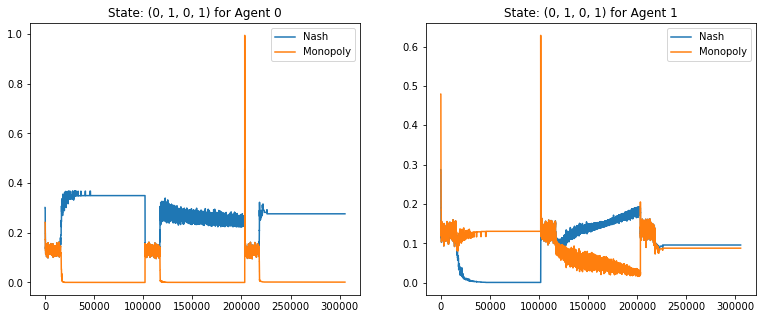

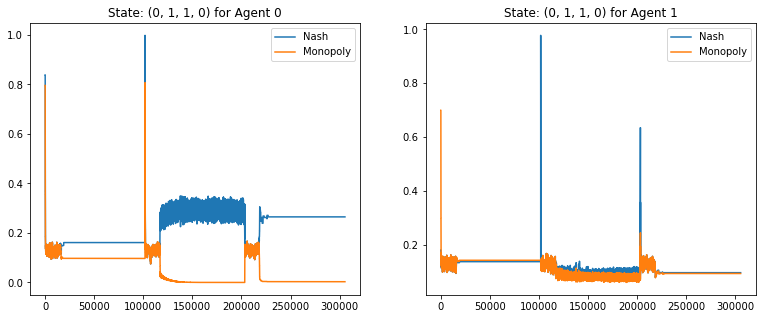

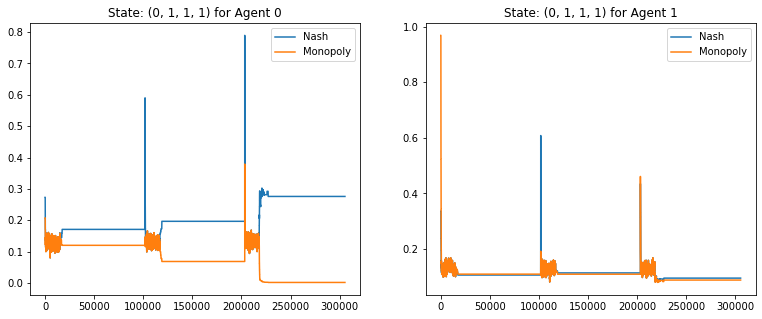

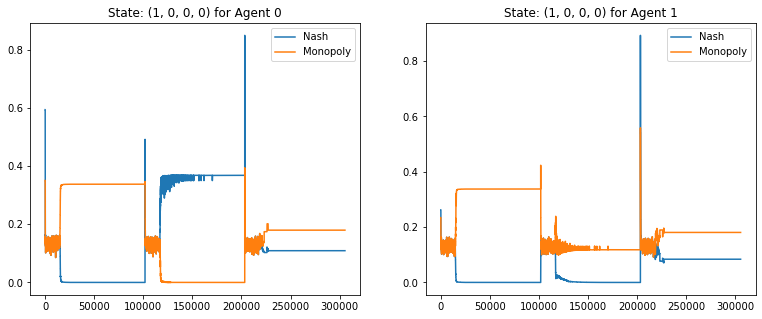

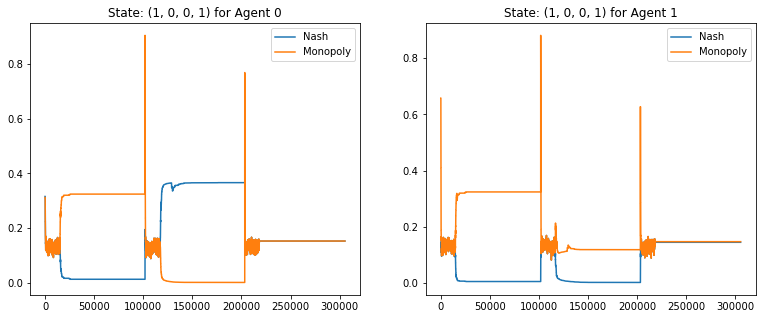

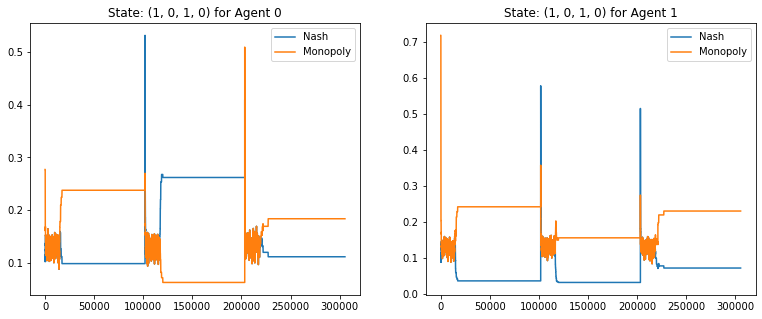

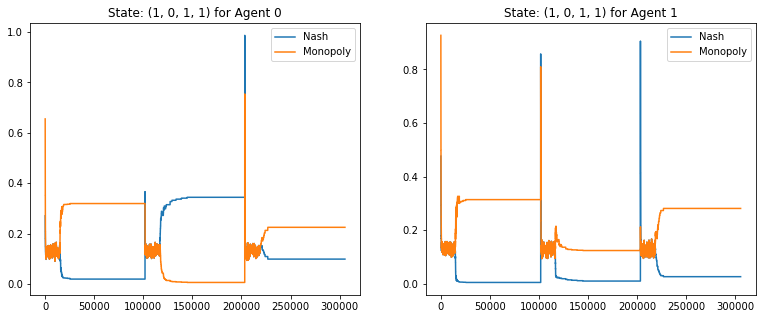

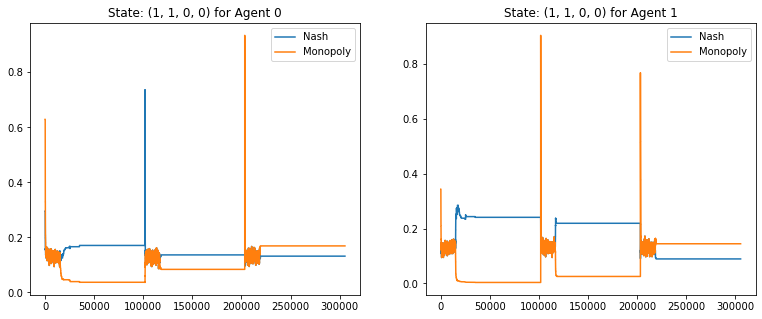

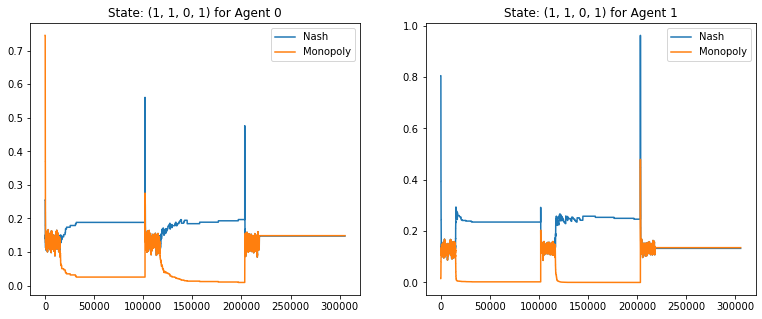

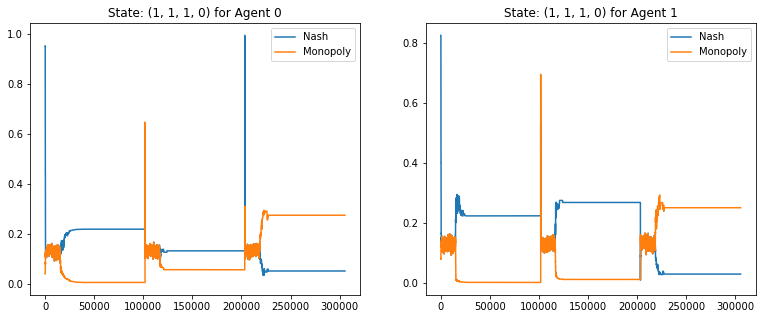

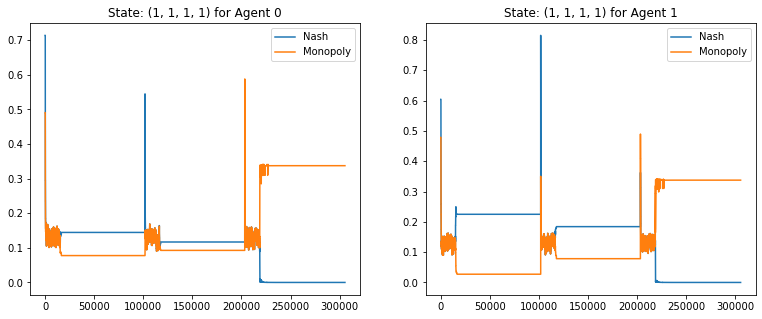

In [22]:
for state in result.env.history.Q_history[0][0].keys():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
    for agent in range(2):
        hist = [Q[agent][state] for Q in result.env.history.Q_history]
        time_series_of_action_value_given_state = pd.DataFrame(hist)
        axes[agent].plot(time_series_of_action_value_given_state)
        axes[agent].title.set_text("State: {} for Agent {}".format(str(state), agent))
        axes[agent].legend(['Nash', "Monopoly"])

# keys with highest Qvalue average sorted

In [66]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        new_dict1[a] += action_space[a]
        
for key,value in new_dict1.items():
    new_dict1[key] = new_dict1[key]/(len(actions)**2)

"""
for state,action_space in result.env.agents[1].Q.items():
    for a in actions:
        new_dict2[a] += action_space[a]
        
for key,value in new_dict2.items():
    new_dict2[key] = new_dict2[key]/(len(actions)**2)
"""
print(sorted(new_dict1, key=lambda k: new_dict1[k],reverse=True))
#print(sorted(new_dict2, key=lambda k: new_dict2[k],reverse=True))

[1.4729218286936814, 1.9249809389308554]


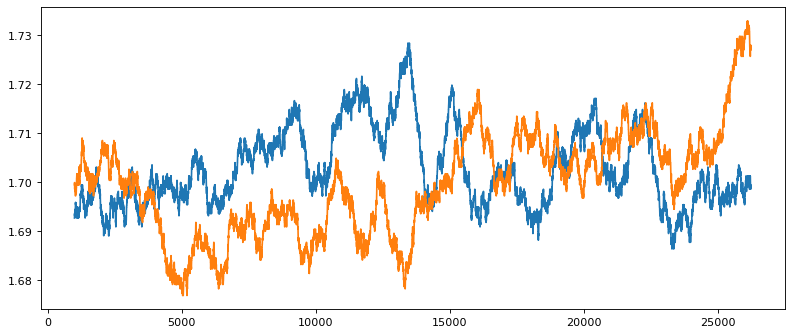

In [20]:

x =np.linspace(0,len(np.array(result.price_history)),num=len(np.array(result.price_history)))
agent_1 = np.array(result.price_history)[:,0]
agent_2 = np.array(result.price_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

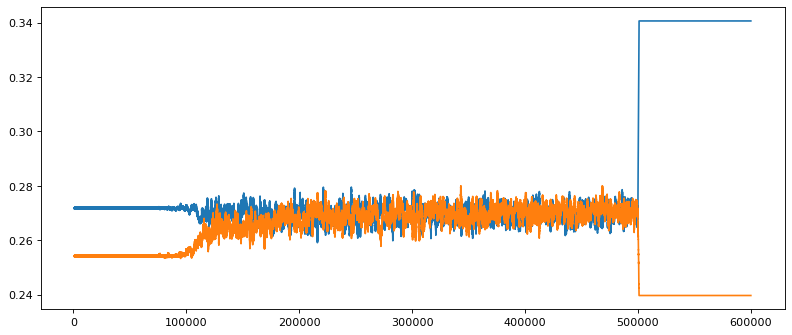

In [28]:

x =np.linspace(0,len(np.array(result.reward_history)),num=len(np.array(result.reward_history)))
agent_1 = np.array(result.reward_history)[:,0]
agent_2 = np.array(result.reward_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

# Average Normalised Profits for different number of firms Box-plot

In [3]:
two_firm = []
three_firm = []
four_firm = []

for i in range(20):
    print("iteration" ,i, "num agents: 2" )
    two_firm.append(main.run(num_agents=2,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
    clear_output()
for i in range(20):
    print("iteration" ,i,"num agents: 3" )
    three_firm.append(main.run(num_agents=3,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
    clear_output()

for i in range(20):
    print("iteration" ,i,"num agents: 4" )
    four_firm.append(main.run(num_agents=4,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
    clear_output()

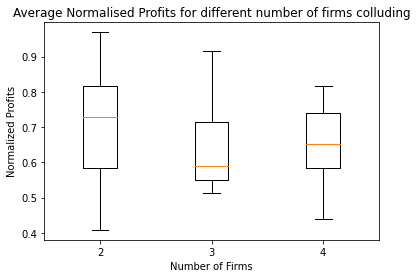

In [7]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.xlabel("Number of Firms")
plt.ylabel("Normalized Profits")
plt.show()

# Average Normalised Profits for different number of firms Box-plot using Boltzmann

In [19]:

two_firm = []
three_firm = []
four_firm = []

for i in range(10):
    two_firm.append(main.run(num_agent=2).normalised_profits.mean())
for i in range(10):
    three_firm.append(main.run(num_agent=3).normalised_profits.mean())
for i in range(10):
    four_firm.append(main.run(num_agent=4).normalised_profits.mean())

 85%|████████▍ | 846772/1000000 [04:35<00:49, 3076.92it/s]


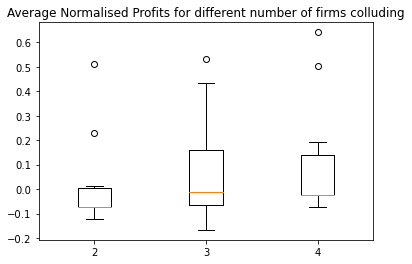

In [20]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.show()

# Heat Map of Normalised Profits for grid values of $\alpha$ and $\beta$

In [ ]:
matrix = []
for alpha in np.arange(0.01,0.2,0.01):
    lst = []
    for beta in np.arange(0.01,2,0.02):
        lst.append(main.run(alpha = alpha, beta = beta*1e-5).normalised_profits.mean())
    matrix.append(lst)

In [21]:
alpha_names = [round(alpha,2) for alpha in np.arange(0.01,0.2,0.01)]
beta_names = [round(beta,2) for beta in np.arange(0.01,2,0.02)]
num_ticks = 5
yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)
yticklabels = [alpha_names[idx] for idx in yticks]

df = pd.DataFrame(matrix, index=alpha_names, columns=beta_names)
heatmap_result = sns.heatmap(df, yticklabels=yticklabels)
heatmap_result.set_yticks(yticks)
heatmap_result.invert_yaxis()

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title(r'Average normalised profits for a Grid of Values of $\alpha$ and $\beta$')

<ipython-input-21-1892dc5e3da0>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)


NameError: name 'matrix' is not defined